# Objetivos de este Notebook

* Explicar cómo se pueden cruzar tablas
* Explicar cómo se pueden construir gráficas con los datos


**Índice**

1. [Importación de librerías](#section1)

2. [Realizar cruces](#section2)

3. [Graficar](#section3)


<a id='section1'></a>
# Importación de librerías

In [1]:
from pydataxm import *          # Importa la libreria que fue instalada con pip install pydataxm o tambien desde GitHub
from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
import datetime as dt           # Permite trabajar con fechas 
import pandas as pd             # Manipulacion de datos
import numpy as np              # Manipulación de datos
import matplotlib.pyplot as plt # Construcción de gráficas

In [2]:
objetoAPI = pydataxm.ReadDB()     # Construir la clase que contiene los métodos de pydataxm

In [3]:
objetoAPI.get_collections('Gene') # Revisar los cruces disponibles para generación real

[[0, 'Generacion Real', 'Sistema', 'Horaria'],
 [1, 'Generacion Real por Recurso', 'Recurso', 'Horaria']]

In [4]:
objetoAPI.get_collections('ListadoRecursos') #Listado de plantas registradas ante el CND

[[0, 'Listado Recursos', 'Sistema', 'Lista'],
 [1, 'Listado Recursos', 'Agente', 'Lista']]

In [5]:
df_generacion = objetoAPI.request_data('Gene',
                                       1,
                                       dt.date(2021,3,1),
                                       dt.date(2021,3,31))

In [6]:
df_generacion.head() #Ver encabezados

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Recurso,2QBW,19874.12,19225.96,17896.89,17092.45,16603.83,16497.05,16399.56,16069.67,...,13981.37,13759.30,14374.97,19748.70,18925.88,16639.23,16269.53,16244.23,15713.35,2021-03-01
1,Recurso,2QRL,671.67,671.25,671.37,671.37,671.31,671.28,671.19,671.01,...,669.84,669.60,670.41,670.47,670.38,670.23,670.26,670.44,670.47,2021-03-01
2,Recurso,2QV2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18525.60,19094.40,19083.60,19072.80,19054.80,2072.50,NaN,NaN,NaN,2021-03-01
3,Recurso,2R22,11098.25,11476.17,11922.43,12166.74,11957.17,10901.77,12776.02,13677.24,...,12682.79,13024.39,13181.92,13591.48,13666.58,13661.82,13207.76,13070.88,17588.90,2021-03-01
4,Recurso,2S6Q,246.00,114.00,312.00,234.00,258.00,528.00,480.00,30.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,18.00,2021-03-01


In [7]:
#df_generacion.iloc[:,2:26]=df_generacion.iloc[:,2:26].apply(pd.to_numeric,errors='coerce') #Convertir a numerico
#df = df_generacion.convert_dtypes()

In [8]:
df_recursos = objetoAPI.request_data(
                                    'ListadoRecursos',
                                    0,
                                    dt.date(2020,3,1),
                                    dt.date(2020,3,31)) # obtiene los recursos en operación y pruebas                                                                                       

In [9]:
df_recursos.head()

,Id,Values_Code,Values_Name,Values_Type,Values_Disp,Values_RecType,Values_CompanyCode,Values_EnerSource,Values_OperStartdate,Values_State,Date
0,Sistema,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,FILO DE AGUA,LCSG,AGUA,2014-03-31,OPERACION,2021-09-09
1,Sistema,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25,OPERACION,2021-09-09
2,Sistema,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,HZEG,AGUA,2014-07-24,OPERACION,2021-09-09
3,Sistema,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30,OPERACION,2021-09-09
4,Sistema,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17,OPERACION,2021-09-09


<a id='section2'></a>
# Realizar cruces

In [10]:
df = pd.merge(df_generacion,df_recursos,left_on=['Values_code'],right_on=['Values_Code'],how='left')

In [11]:
df_solar = df.query('Values_Type=="SOLAR"')

In [12]:
df_solar.Values_Name.unique() #Recursos considerados

array(['AUTOG CELSIA SOLAR YUMBO', 'CELSIA SOLAR BOLIVAR',
       'CELSIA SOLAR ESPINAL', 'TRINA-VATIA BSLI',
       'PLANTA SOLAR BAYUNCA I', 'CELSIA SOLAR CARMELO', 'EL PASO',
       'TRINA-VATIA BSLII', 'TRINA-VATIA BSLIII', 'GRANJA SOLAR BELMONTE'],
      dtype=object)

In [13]:
df_total = df_solar.iloc[:,1:27].melt(id_vars=['Date_x','Values_code']).fillna(0) #sustituir datos faltantes por cero

In [14]:
data = df_total.groupby('variable').sum()                             #Sumar Energia
data.index = [x.replace('Values_Hour','H') for x in data.index]       #Reajustar textos del indice

<a id='section3'></a>
# Graficar

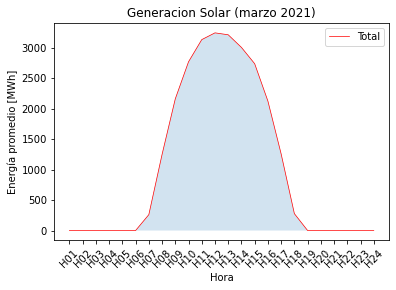

In [15]:
data = data.divide(1000)

fig, ax = plt.subplots()
ax.plot(data,'r',linewidth=0.7,label='Total')
ax.fill(data,alpha=0.2)
ax.set_ylabel('Energía promedio [MWh]')
ax.set_xlabel('Hora')
ax.legend()
plt.xticks(rotation = 45);
plt.title('Generacion Solar (marzo 2021)');